# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost 
warnings.filterwarnings('ignore')

# Read The Data Set


In [2]:
df = pd.read_csv(r"C:\Users\navan\project smartinternz\Electric Motor Temperature Prediction Using IBM Watson\Dataset\measures_v2.csv")
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


# Uni-Variate Analysis

#Bar Graph

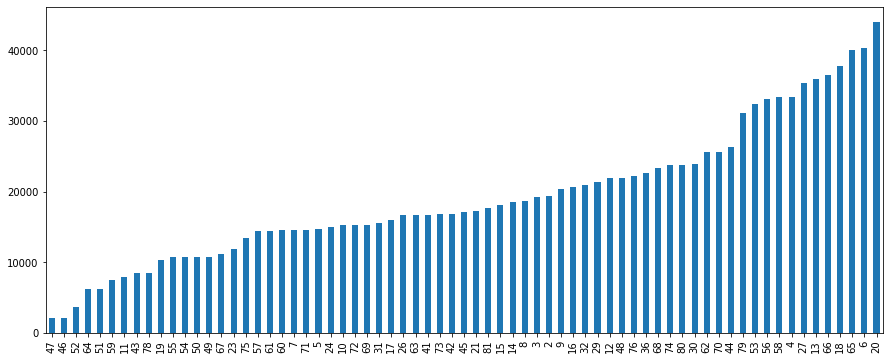

In [3]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')

As we can see, session ids 65, 6 and 20 have the most number of measurements recorded

In [4]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

#Plotting Distribution and Boxplot for all the features to check for skewness

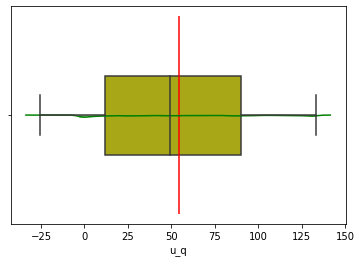

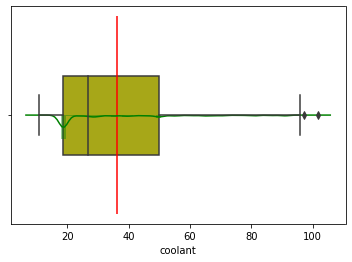

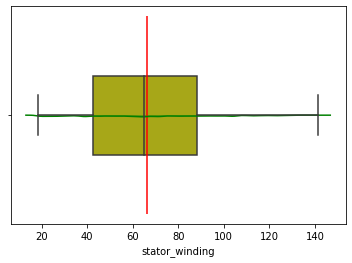

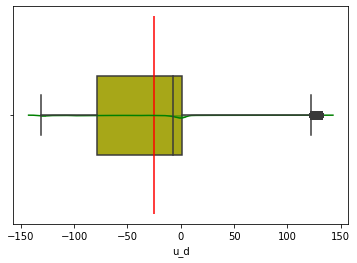

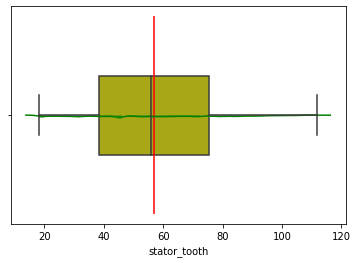

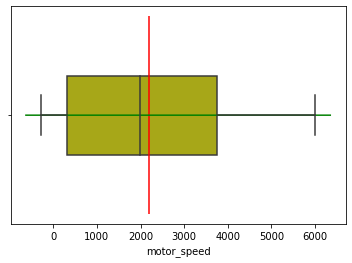

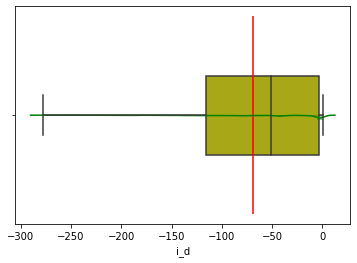

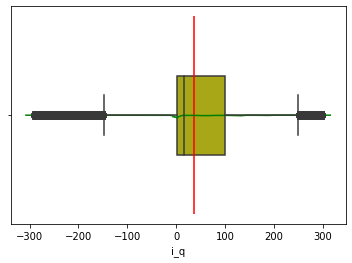

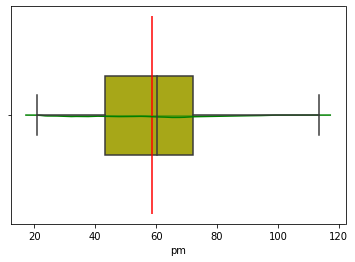

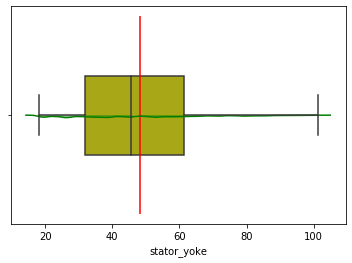

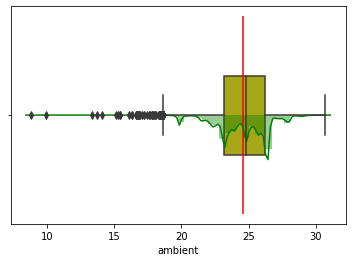

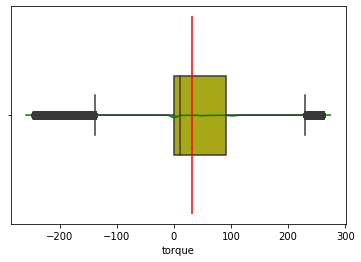

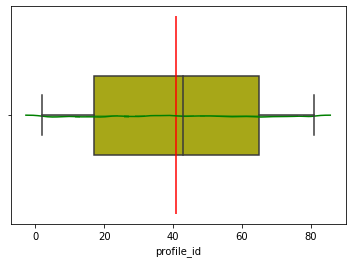

In [5]:
for i in df.columns:
    sns.distplot(df[i],color='g')
    sns.boxplot(df[i],color = 'y')
    plt.vlines(df[i].mean(),ymin = -1,ymax = 1,color = 'r')
    #drawing the mean line
    plt.show()

# Multi-Variate Analysis

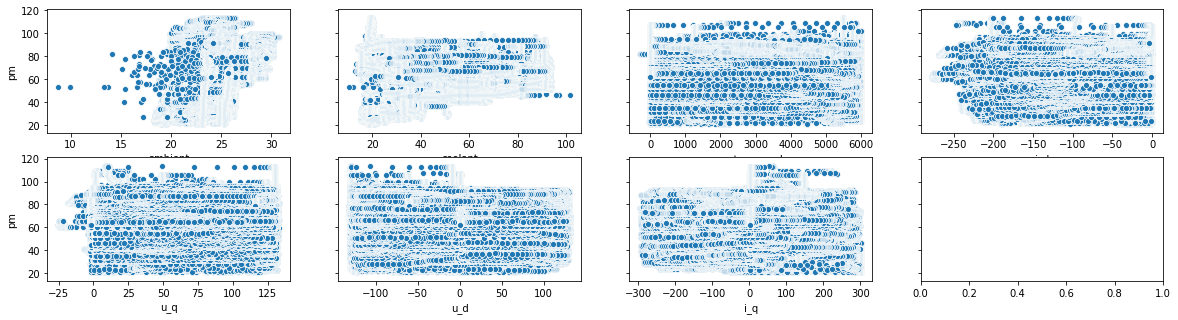

In [6]:
fig,axes = plt.subplots(2,4, figsize=(20,5),sharey=True)
sns.scatterplot(df['ambient'],df['pm'],ax=axes[0][0])
sns.scatterplot(df['coolant'],df['pm'],ax=axes[0][1])
sns.scatterplot(df['motor_speed'],df['pm'],ax=axes[0][2])
sns.scatterplot(df['i_d'],df['pm'],ax=axes[0][3])
sns.scatterplot(df['u_q'],df['pm'],ax=axes[1][0])
sns.scatterplot(df['u_d'],df['pm'],ax=axes[1][1])
sns.scatterplot(df['i_q'],df['pm'],ax=axes[1][2])

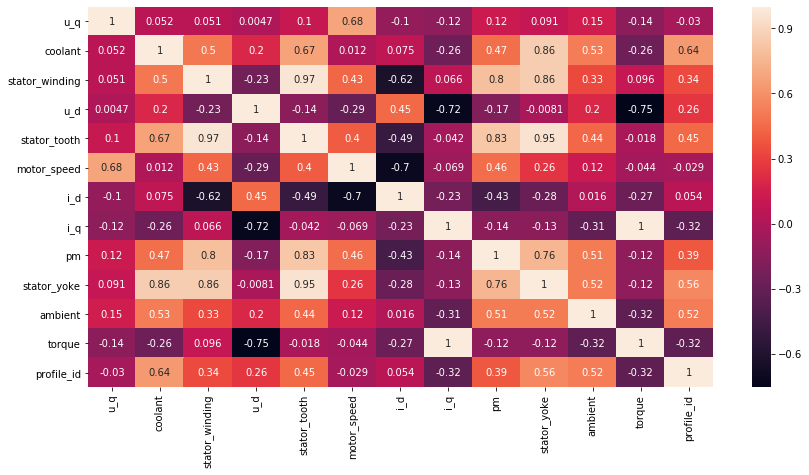

In [7]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True);

For a random measurement, we can try to compare the temperatures of the 3 stator components.

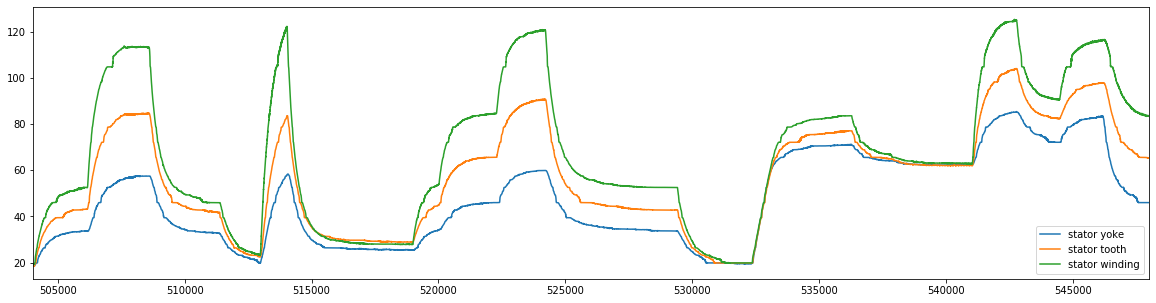

In [8]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend();

In [9]:
df = df[(df['profile_id'] != 65) & (df['profile_id'] != 72)]
df_test = df[(df['profile_id'] == 65) | (df['profile_id'] == 72)]


In [10]:
df.drop('profile_id',axis = 1, inplace=True)
df_test.drop('profile_id',axis = 1,inplace=True)


# Descriptive Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275421 entries, 0 to 1330815
Data columns (total 12 columns):
u_q               1275421 non-null float64
coolant           1275421 non-null float64
stator_winding    1275421 non-null float64
u_d               1275421 non-null float64
stator_tooth      1275421 non-null float64
motor_speed       1275421 non-null float64
i_d               1275421 non-null float64
i_q               1275421 non-null float64
pm                1275421 non-null float64
stator_yoke       1275421 non-null float64
ambient           1275421 non-null float64
torque            1275421 non-null float64
dtypes: float64(12)
memory usage: 126.5 MB


In [12]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06
mean,5.467278e+01,3.573907e+01,6.618915e+01,-2.665449e+01,5.664815e+01,2.213150e+03,-6.915157e+01,3.961607e+01,5.830613e+01,4.787477e+01,2.450673e+01,3.296862e+01
std,4.401722e+01,2.177377e+01,2.877179e+01,6.263354e+01,2.299736e+01,1.853909e+03,6.500080e+01,9.190634e+01,1.915849e+01,2.000256e+01,1.938694e+00,7.686049e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.211611e+01,1.867717e+01,4.275755e+01,-8.168377e+01,3.817702e+01,4.199994e+02,-1.157185e+02,1.096042e+00,4.265267e+01,3.136627e+01,2.317471e+01,-7.787925e-02
50%,4.912165e+01,2.450738e+01,6.498370e+01,-7.612911e+00,5.591809e+01,1.999977e+03,-5.204414e+01,2.110541e+01,6.012479e+01,4.533315e+01,2.475581e+01,1.627305e+01
75%,9.017855e+01,4.982456e+01,8.788722e+01,1.305528e+00,7.546349e+01,3.757985e+03,-2.980299e+00,1.058248e+02,7.187637e+01,6.088336e+01,2.614597e+01,9.359407e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


# Data Pre-Processing

In [13]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197


Drop Unwanted Features

In [14]:
df.drop(['stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)

,u_q,coolant,u_d,motor_speed,i_d,i_q,pm,ambient
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,24.554214,19.850691
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,24.538078,19.850672
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,24.544693,19.850657
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,24.554018,19.850647
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,24.565397,19.850639
5,-0.538973,18.901548,0.009147,0.009636,-0.613635,0.336747,24.573601,19.850634
6,-0.653148,18.941711,0.238890,0.001337,-1.005647,0.554211,24.576578,19.850630
7,-0.758392,18.960861,0.395099,0.001422,-1.288384,0.706370,24.574949,19.850628
8,-0.727128,18.973545,0.546623,0.000577,-1.490530,0.817339,24.567080,19.850626
9,-0.874307,18.987812,0.578944,-0.001248,-1.634464,0.898013,24.553242,19.850624


Handling Missing Values


In [15]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
dtype: int64

Handling Outliers

In our Dataset all the values are in the same range, so outliers replacing is not necessary.

Handling Categorical Values

In our dataset, there is no categorical data type, so we can skip this step.

Normalizing The Values

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X_df_test = df_test.drop(['pm','stator_yoke','stator_tooth','stator_winding','torque'],axis = 1)
X

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,19.850691
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,19.850672
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,19.850657
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,19.850647
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,19.850639
5,-0.538973,18.901548,0.009147,0.009636,-0.613635,0.336747,19.850634
6,-0.653148,18.941711,0.238890,0.001337,-1.005647,0.554211,19.850630
7,-0.758392,18.960861,0.395099,0.001422,-1.288384,0.706370,19.850628
8,-0.727128,18.973545,0.546623,0.000577,-1.490530,0.817339,19.850626
9,-0.874307,18.987812,0.578944,-0.001248,-1.634464,0.898013,19.850624


In [18]:
names = X.columns

In [19]:
mm = MinMaxScaler()
X = mm.fit_transform(X)
y = df['pm']

In [20]:
X=pd.DataFrame(X,columns = names)

In [21]:
X.shape

(1275421, 7)

In [22]:
y.shape

(1275421,)

In [23]:
import joblib
joblib.dump(mm,'transform.save')

['transform.save']

Splitting Data Into Train And Test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Model Building

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from xgboost import XGBClassifier

Liner Regression


Random Forest Model

Decision Tree Model

Support Vector Machine Model

In [26]:
lr=LinearRegression()
dr=DecisionTreeRegressor()
rf=RandomForestRegressor()
svm=SVR()


In [27]:
xgb=xgboost.XGBRegressor()


In [28]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
dr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [31]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [32]:
#svm.fit(X_train,y_train)

# Compare The Model

In [33]:
from sklearn import metrics

In [34]:
p1=lr.predict(X_test)

In [35]:
p2=dr.predict(X_test)

In [36]:
p3=rf.predict(X_test)

In [37]:
#p4=svm.predict(X_test)

In [38]:
print(metrics.r2_score(y_test,p1))

0.6065442366283014


In [39]:
#print(metrics.r2_score(y_test,p2))
#print(metrics.r2_score(y_test,p3))
#print(metrics.r2_score(y_test,p4))

Evaluating Performance Of The Model

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
print(mean_squared_error(y_test,p1))

143.7723822639573


# Save The Model

In [42]:
import joblib

In [43]:
joblib.dump(dr,"model.save")

['model.save']